In [1]:
import sys
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from utils import Metrics

{'C - Entropy - Ensemble', 'B - Entropy - Single Net', 'A - Segmentation Distortion'}


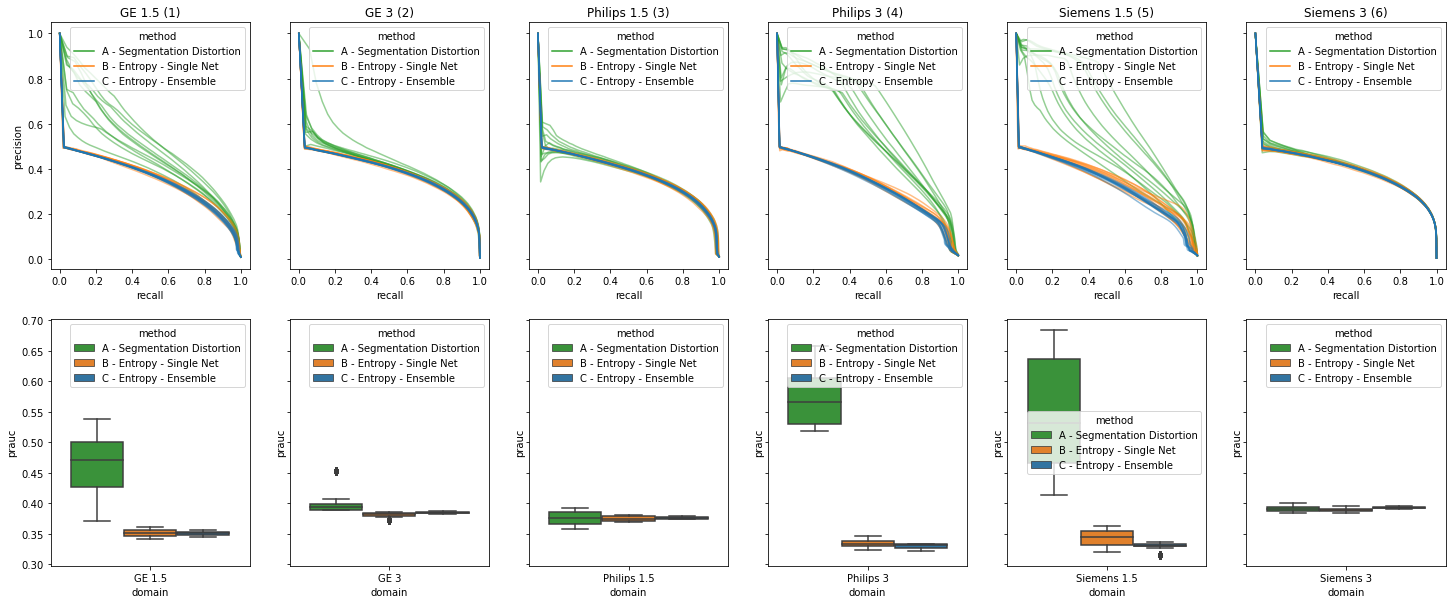

In [2]:
# internal params
directory = f'../../results/ae/eval/pixel/'
net_out = 'calgary'
methods = ['base', 'ensemble', 'localAug_multiImgSingleView_res_balanced_same']
domains = {
    '1': 'GE 1.5',
    '2': 'GE 3',
    '3': 'Philips 1.5',
    '4': 'Philips 3',
    '5': 'Siemens 1.5',
    '6': 'Siemens 3'
}
n_runs = 10

df = pd.DataFrame(columns=['precision', 'recall', 'domain', 'run', 'method'])
Methods = []

for method in methods:
    for domain in domains:
        for run in range(n_runs):
            data = torch.load(
                f'{directory}{net_out}-{method}-{domain}-{run}'
            )
            data.pre[-1] = 1
            if method == 'localAug_multiImgSingleView_res_balanced_same':
                m = 'A - Segmentation Distortion'
            if method == 'base':
                m = 'B - Entropy - Single Net'
            if method == 'ensemble':
                 m = 'C - Entropy - Ensemble'
            Methods.append(m)
                    
            data_df = pd.DataFrame()
            data_df['precision'] = data.pre
            data_df['recall']    = data.rec
            data_df['method']    = m
            data_df['domain']    = domains[domain]
            data_df['run']       = run
            data_df['prauc']     = data.auc_pr
            df = pd.concat([df, data_df], ignore_index=True)

        
df = df.sort_values('method')

Methods = set(Methods)
print(Methods)
fig, axes = plt.subplots(2, 6, figsize=(25, 10), sharey='row')
colors = sns.color_palette('tab10', len(methods))
palette = {method: color for method, color in zip(Methods, colors)}

for i, domain in enumerate(domains):
    sns.lineplot(
        ax=axes[0, i],
        data=df[(df['domain'] == domains[domain])], 
        x='recall', 
        y='precision', 
        hue='method', 
        units='run',
        palette=palette,
        alpha=0.5, 
        estimator=None
    )
    axes[0, i].set_title(f'{domains[domain]} ({domain})')
    
    sns.boxplot(
        ax=axes[1, i],
        data=df[(df['domain'] == domains[domain])],
        x="domain", 
        y='prauc',
        hue="method",
        palette=palette,
    )
plt.savefig('../../assests/calgary_pixel_denoise.png', bbox_inches='tight', dpi=400, transparent=False)

In [37]:
df.groupby('run').mean().sort_values('prauc')

,precision,recall,prauc
run,,,
7,0.185599,0.837564,0.378336
2,0.182249,0.845629,0.386209
5,0.181844,0.846826,0.386985
6,0.192043,0.837957,0.388936
3,0.183071,0.848325,0.389410
9,0.184438,0.848726,0.393722
8,0.192105,0.844145,0.396827
4,0.191806,0.842930,0.401466
0,0.203595,0.829613,0.405246


In [4]:
df.head()

,precision,recall,domain,run,method,prauc
44999,1.000000,0.000018,Siemens 3,9,A - Segmentation Distortion,0.388134
35006,0.032639,0.991107,Philips 1.5,0,A - Segmentation Distortion,0.373519
35005,0.031207,0.991136,Philips 1.5,0,A - Segmentation Distortion,0.373519
35004,0.024361,0.991136,Philips 1.5,0,A - Segmentation Distortion,0.373519
35003,0.024361,0.991136,Philips 1.5,0,A - Segmentation Distortion,0.373519


In [5]:
data_df.head()

,precision,recall,method,domain,run,prauc
0,0.006223,1.000000,A - Segmentation Distortion,Siemens 3,9,0.388134
1,0.012408,0.999762,A - Segmentation Distortion,Siemens 3,9,0.388134
2,0.013735,0.999762,A - Segmentation Distortion,Siemens 3,9,0.388134
3,0.014659,0.999762,A - Segmentation Distortion,Siemens 3,9,0.388134
4,0.015418,0.999762,A - Segmentation Distortion,Siemens 3,9,0.388134


In [6]:
data.rec

tensor([1.0000e+00, 9.9976e-01, 9.9976e-01, 9.9976e-01, 9.9976e-01, 9.9976e-01,
        9.9976e-01, 9.9976e-01, 9.9976e-01, 9.9976e-01, 9.9976e-01, 9.9976e-01,
        9.9976e-01, 9.9976e-01, 9.9976e-01, 9.9976e-01, 9.9974e-01, 9.9974e-01,
        9.9974e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01,
        9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01,
        9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01,
        9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01,
        9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01,
        9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01,
        9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01,
        9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01,
        9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01, 9.9973e-01,
        9.9973e-01, 9.9973e-01, 9.9973e-